In [1]:

import tensorflow as tf
import numpy as np
import h5py
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Configure Keras to use GPU
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

2024-08-27 16:13:44.782290: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-27 16:13:44.816413: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 16:13:44.816442: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 16:13:44.816462: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-27 16:13:44.822509: I tensorflow/core/platform/cpu_feature_g

Derrick's

In [16]:
h5_filename = '/home/m3-learning/Documents/Research Data/Electron Detection/Data Generated/40MixedImages.h5'
with h5py.File(h5_filename, 'r') as f:
    images = np.array(f['images'])
    centers = np.array(f['centers_training'])


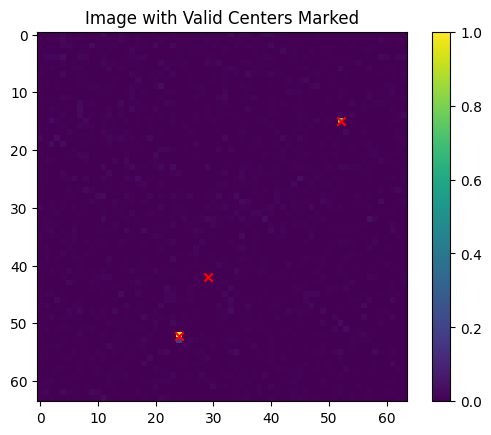

In [18]:
a = np.random.randint(0, len(images))
# a =2
image = images[a]
centerss = centers[a]

# Plot the image with valid centers
plt.imshow(image, )
valid_centers = centerss[centerss[:, 0] == 1]
for center in valid_centers:
    plt.scatter(center[1], center[2], c='red', marker='x')  # Note: center[1] is x and center[2] is y
plt.title('Image with Valid Centers Marked')
plt.colorbar()
plt.show()

In [20]:
j=np.random.randint(0, len(images))
centers[j]

array([[ 1.      , 28.306301, 52.      ],
       [ 1.      , 24.      , 37.436127],
       [ 1.      , 27.114681, 45.      ]], dtype=float32)

Josh's

In [10]:
h52_filename = '/home/m3-learning/Documents/Research Data/Electron Detection/Data Generated/Josh100KImages_3 electrons_only.h5'
with h5py.File(h52_filename, 'r') as f:
    images2 = np.array(f['images'])
    centers2 = np.array(f['centers_training'])


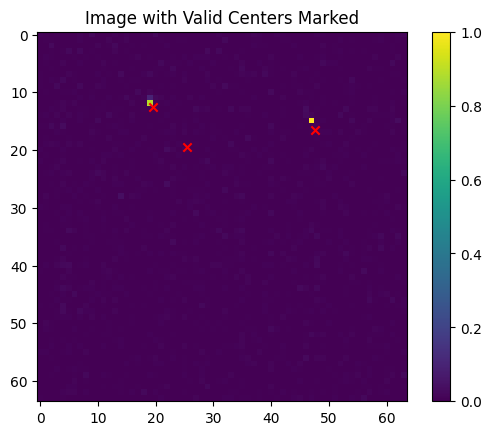

In [27]:
a2 = np.random.randint(0, len(images2))
# a =2
image2 = images2[a2]
centerss2 = centers2[a2]

# Plot the image with valid centers
plt.imshow(image2, )
valid_centers2 = centerss2[centerss2[:, 0] == 1]
for center2 in valid_centers2:
    plt.scatter(center2[1], center2[2], c='red', marker='x')  # Note: center[1] is x and center[2] is y
plt.title('Image with Valid Centers Marked')
plt.colorbar()
plt.show()

In [47]:
j2=np.random.randint(0, len(images2))
centers2[j2]

array([[ 1. , 38.5, 35.5],
       [ 1. , 17.5, 60.5],
       [ 1. , 20.5, 59.5]], dtype=float32)

Jingrui's

In [4]:
with h5py.File('/home/m3-learning/Documents/Research Data/Simple Object Detection/Data/TrainingData5zeroes midpoints.h5', 'r') as hdf:
    ls = list(hdf.keys())
    images3 = hdf.get('images')
    # boxes = hdf.get('boxes')
    centers3 = hdf.get('center_coordinates')
    images3 = np.array(images3)
    # boxes = np.array(boxes)
    centers3 = np.array(centers3)

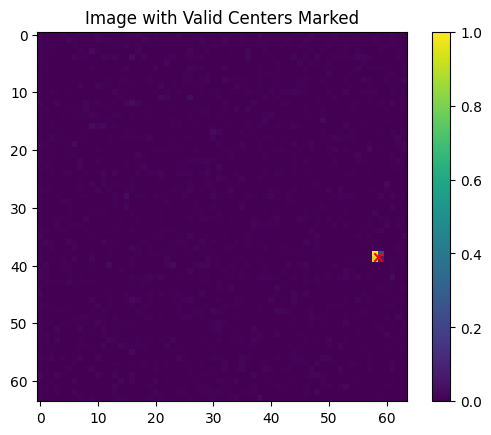

In [9]:
# a = np.random.randint(0, len(images3))
a =1
image3 = images3[a].T
centerss3 = centers3[a]

# Plot the image with valid centers
plt.imshow(image3, )
valid_centers3 = centerss3[centerss3[:, 0] == 1]
for center in valid_centers3:
    plt.scatter(center[1], center[2], c='red', marker='x')  # Note: center[1] is x and center[2] is y
plt.title('Image with Valid Centers Marked')
plt.colorbar()
plt.show()

In [39]:
m=np.random.randint(0, len(images3))
centers3[m]

array([[ 1. , 13. ,  4.5],
       [ 1. , 61.5, 36. ],
       [ 1. , 56.5, 32. ],
       [ 1. , 39.5, 61.5],
       [ 1. , 16.5, 60. ],
       [ 1. , 58.5,  0.5],
       [ 1. , 59. , 43.5],
       [ 1. , 41.5, 31.5],
       [ 1. , 37. , 31.5],
       [ 1. , 15.5, 58. ],
       [ 1. , 41.5, 36. ],
       [ 1. , 48. , 27.5],
       [ 1. , 49.5, 35. ],
       [ 1. , 21.5, 42.5],
       [ 1. , 50. , 62.5],
       [ 1. , 14.5, 33.5],
       [ 1. , 18. , 46.5],
       [ 1. , 24. , 53.5],
       [ 1. , 61.5, 22. ],
       [ 1. , 51. ,  4.5],
       [ 1. , 15. ,  2.5],
       [ 1. , 33.5, 28. ],
       [ 1. ,  6.5, 14.5],
       [ 1. , 20.5, 59. ],
       [ 1. , 19.5, 40.5],
       [ 1. , 42.5, 14. ],
       [ 1. , 51. , 59.5],
       [ 1. , 50.5, 43. ],
       [ 1. , 48.5, 22. ],
       [ 1. , 59. , 13.5],
       [ 1. , 29. , 18.5],
       [ 1. , 20.5, 52.5],
       [ 1. ,  9.5, 39.5],
       [ 1. ,  3. , 31.5],
       [ 1. , 61.5, 40.5],
       [ 1. , 44. , 42.5],
       [ 1. , 11.5,  6. ],
 